In [1]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

import re
import os
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import math
%matplotlib inline

In [18]:
pip install --upgrade tensorflow 

     |████████████████████████████████| 175.3 MB 63 kB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 2.6 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 3.0 MB/s eta 0:00:011
     |████████████████████████████████| 57 kB 7.3 MB/s eta 0:00:011
     |████████████████████████████████| 104 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 1.3 MB/s eta 0:00:01
Processing /Users/manodharallu/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6/termcolor-1.1.0-cp37-none-any.whl
     |████████████████████████████████| 454 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 777 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 367 kB/s eta 0:00:01
     |████████████████████████████████| 88 kB 1.5 MB/s eta 0:00:01
     |███████████████████████████

In [2]:
data=pd.read_csv("Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [4]:
data.shape

(14640, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [71]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

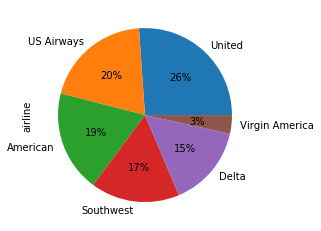

In [82]:
data.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

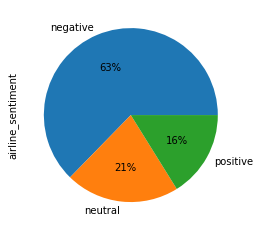

In [87]:
data.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')


In [73]:
pd.crosstab(data.airline, data.airline_sentiment)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


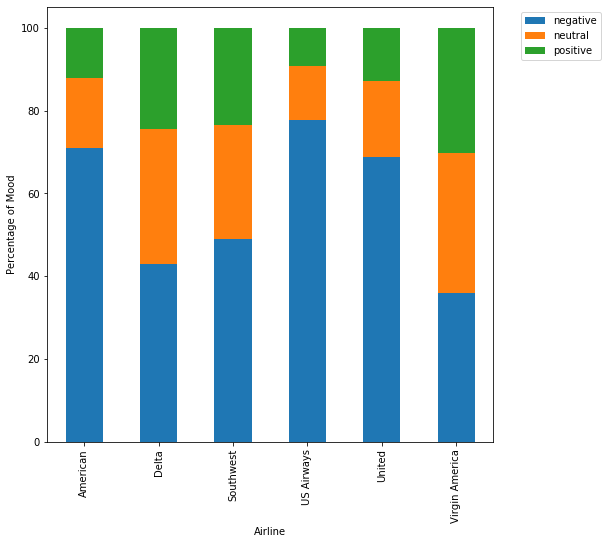

In [94]:
#Visualize sentiment in precentage per airline
x = pd.crosstab(data.airline, data.airline_sentiment).apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar',figsize=(8,8),stacked=True)
x.title.set_size(18)
x.set_xlabel('Airline')
x.set_ylabel('Percentage of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

Text(0, 0.5, 'Negative Reasons')

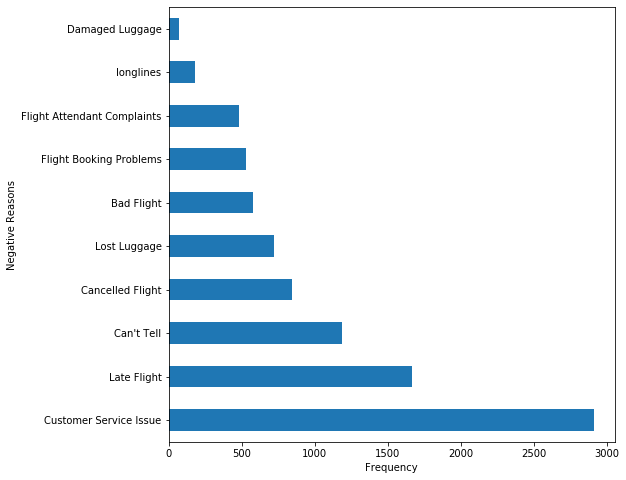

In [97]:
#Visualize how many tweets per negative reasons
colors = sns.color_palette('husl',10)
data.negativereason.value_counts().plot(kind='barh',figsize=(8,8))
plt.xlabel('Frequency')
plt.ylabel('Negative Reasons')

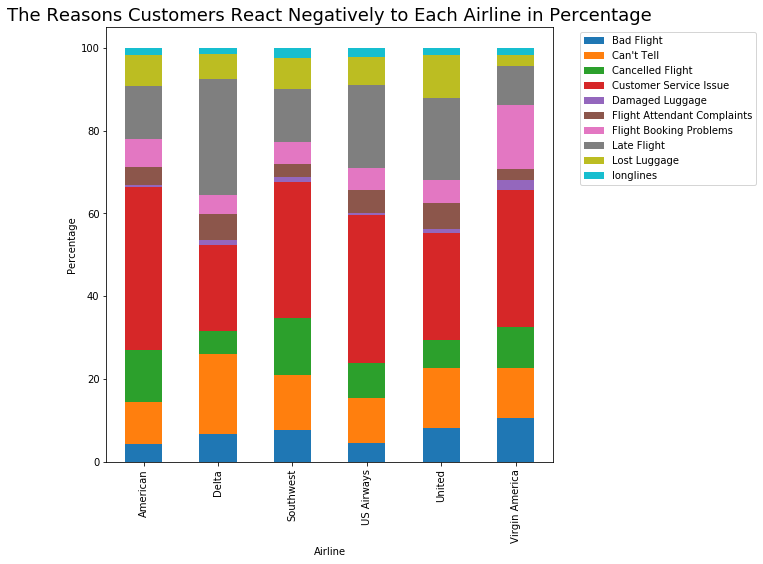

In [100]:

#Visualize negative reasons in precentage per airline
colors=sns.color_palette("husl",10)
pd.crosstab(data.airline, data.negativereason).apply(lambda x: x/x.sum() * 100, axis=1).plot(kind="bar",figsize=(8,8),stacked=True)
plt.title('The Reasons Customers React Negatively to Each Airline in Percentage', fontsize=18)
plt.xlabel('Airline')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

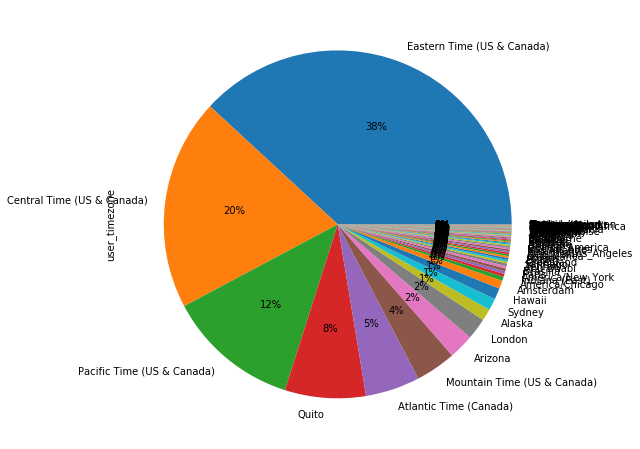

In [7]:
data.user_timezone.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(8,8))

# Data Preprocessing

In [4]:
from tensorflow.keras.layers import Embedding

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [6]:
data['airline_sentiment'] = data['airline_sentiment'].replace('neutral', 1)
data['airline_sentiment'] = data['airline_sentiment'].replace('negative', 0)
data['airline_sentiment'] = data['airline_sentiment'].replace('positive', 2)

In [7]:
X = data['text']
y = data['airline_sentiment']

In [8]:
t = Tokenizer()
t.fit_on_texts(X)

In [9]:
vocab_size = len(t.word_index) + 1

In [10]:
sequences = t.texts_to_sequences(X)

In [11]:
def max_tweet():
    for i in range(1, len(sequences)):
        max_length = len(sequences[0])
        if len(sequences[i]) > max_length:
            max_length = len(sequences[i])
    return max_length

In [12]:
tweet_num = max_tweet()
tweet_num

30

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = tweet_num
padded_X = pad_sequences(sequences, padding='post', maxlen=maxlen)

In [14]:
labels = to_categorical(np.asarray(y))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_X, labels, test_size = 0.2, random_state = 0)

In [16]:
print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

X_train size: (11712, 30)
y_train size: (11712, 3)
X_test size: (2928, 30)
y_test size: (2928, 3)


In [17]:
embeddings_index = dict()
f = open('/Users/manodharallu/Desktop/Spring 2020/NLP/Project/Data/twitter-airline-sentiment/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [18]:
embedding_matrix = np.zeros((vocab_size, 100))

# fill in matrix
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # add to matrix
        embedding_matrix[i] = embedding_vector

In [19]:
from tensorflow.keras.layers import Embedding

# input is vocab_size, output is 100
# weights from embedding matrix, set trainable = False
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix],
                           input_length = tweet_num, trainable=False)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import BatchNormalization

# Model 1: Simple LSTM Model with regularization

In [29]:
lstm_mod1 = Sequential()
lstm_mod1.add(embedding_layer)
lstm_mod1.add(LSTM(256, 
               dropout = 0.2, 
               recurrent_dropout = 0.5))
lstm_mod1.add(Dense(3, activation='softmax'))
lstm_mod1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
lstm_mod1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               365568    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 1,943,239
Trainable params: 366,339
Non-trainable params: 1,576,900
_________________________________________________________________


In [30]:
hist_1 = lstm_mod1.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 7s 178ms/step - loss: 0.8522 - acc: 0.6282 - val_loss: 0.7873 - val_acc: 0.6513
Epoch 2/100
37/37 [==============================] - 7s 180ms/step - loss: 0.7134 - acc: 0.7102 - val_loss: 0.6310 - val_acc: 0.7507
Epoch 3/100
37/37 [==============================] - 7s 179ms/step - loss: 0.6362 - acc: 0.7468 - val_loss: 0.5990 - val_acc: 0.7554
Epoch 4/100
37/37 [==============================] - 7s 190ms/step - loss: 0.6129 - acc: 0.7500 - val_loss: 0.6280 - val_acc: 0.7456
Epoch 5/100
37/37 [==============================] - 7s 184ms/step - loss: 0.6200 - acc: 0.7499 - val_loss: 0.5771 - val_acc: 0.7708
Epoch 6/100
37/37 [==============================] - 7s 183ms/step - loss: 0.5824 - acc: 0.7629 - val_loss: 0.5761 - val_acc: 0.7725
Epoch 7/100
37/37 [==============================] - 7s 186ms/step - loss: 0.5676 - acc: 0.7713 - val_loss: 0.5610 - val_acc: 0.7810
Epoch 8/100
37/37 [==============================] - 7s 185ms/step - 

In [31]:
# Find train and test accuracy
loss, accuracy = lstm_mod1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_mod1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9550
Testing Accuracy:  0.7719


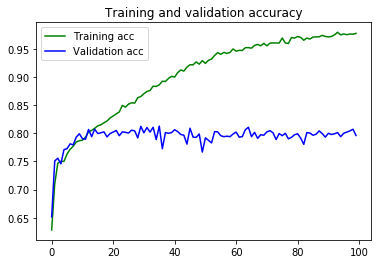

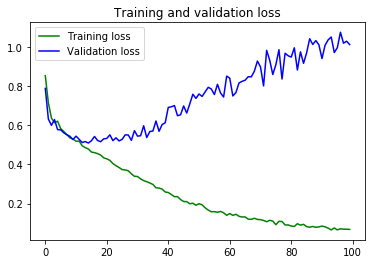

In [32]:
# Plot train/test loss and accuracy
acc = hist_1.history['acc']
val_acc = hist_1.history['val_acc']
loss = hist_1.history['loss']
val_loss = hist_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [35]:
# Get predicted values
y_pred = lstm_mod1.predict(X_test)  # outputs probabilities of each sentiment
# Create empty numpy array to match length of training observations
y_pred_array = np.zeros(X_test.shape[0])

# Find class with highest probability
for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # column with max probability
    y_pred_array[i] = label_predict

# convert to integers
y_pred_array = y_pred_array.astype(int)

NameError: name 'lstm_mod1' is not defined

In [36]:
# Convert y_test to 1d numpy array
y_test_array = np.zeros(X_test.shape[0])

# Find class with 1
for i in range(0, y_test.shape[0]):
    label_predict = np.argmax(y_test[i])
    y_test_array[i] = label_predict

y_test_array = y_test_array.astype(int)

In [37]:
class_names = np.array(['Negative', 'Neutral', 'Positive'])

In [1]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'plt' is not defined

# Model 2: LSTM with regularization, reduce dimensionality

In [52]:
lstm_mod2 = Sequential()
lstm_mod2.add(embedding_layer)
lstm_mod2.add(LSTM(64, 
               dropout = 0.2, 
               recurrent_dropout = 0.5))
lstm_mod2.add(Dense(3, activation='softmax'))
lstm_mod2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
lstm_mod2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 1,619,335
Trainable params: 42,435
Non-trainable params: 1,576,900
_________________________________________________________________


In [53]:
hist_2 = lstm_mod2.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 3s 70ms/step - loss: 0.8821 - acc: 0.6077 - val_loss: 0.8520 - val_acc: 0.6176
Epoch 2/100
37/37 [==============================] - 2s 63ms/step - loss: 0.8057 - acc: 0.6519 - val_loss: 0.7625 - val_acc: 0.6944
Epoch 3/100
37/37 [==============================] - 2s 63ms/step - loss: 0.7145 - acc: 0.7045 - val_loss: 0.6800 - val_acc: 0.7307
Epoch 4/100
37/37 [==============================] - 2s 62ms/step - loss: 0.6630 - acc: 0.7327 - val_loss: 0.6394 - val_acc: 0.7456
Epoch 5/100
37/37 [==============================] - 2s 65ms/step - loss: 0.6266 - acc: 0.7455 - val_loss: 0.5986 - val_acc: 0.7589
Epoch 6/100
37/37 [==============================] - 2s 64ms/step - loss: 0.6097 - acc: 0.7512 - val_loss: 0.5870 - val_acc: 0.7708
Epoch 7/100
37/37 [==============================] - 2s 62ms/step - loss: 0.5852 - acc: 0.7633 - val_loss: 0.5777 - val_acc: 0.7734
Epoch 8/100
37/37 [==============================] - 2s 64ms/step - loss: 0.

In [54]:
# Find train and test accuracy
loss, accuracy = lstm_mod2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_mod2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9168
Testing Accuracy:  0.7947


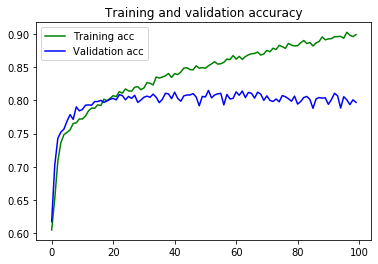

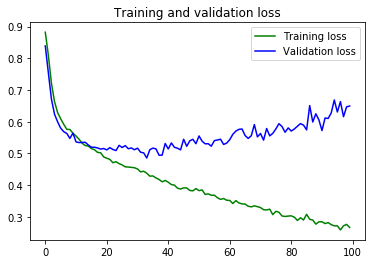

In [24]:
# Plot train/test loss and accuracy
acc = hist_2.history['acc']
val_acc = hist_2.history['val_acc']
loss = hist_2.history['loss']
val_loss = hist_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
# Get predicted values
y_pred = lstm_mod2.predict(X_test)  # outputs probabilities of each sentiment
# Create empty numpy array to match length of training observations
y_pred_array = np.zeros(X_test.shape[0])

# Find class with highest probability
for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # column with max probability
    y_pred_array[i] = label_predict

# convert to integers
y_pred_array = y_pred_array.astype(int)

Confusion matrix, without normalization
[[1610  211   49]
 [ 175  388   51]
 [  71   59  314]]
Normalized confusion matrix
[[0.86 0.11 0.03]
 [0.29 0.63 0.08]
 [0.16 0.13 0.71]]


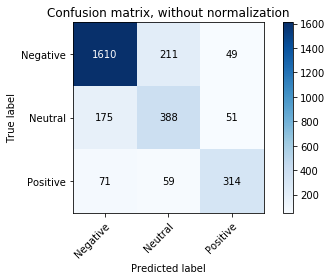

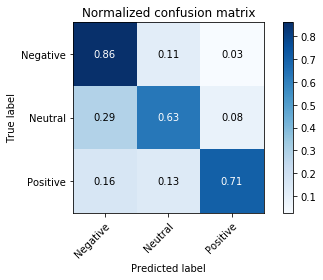

In [39]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [46]:
# LSTM Model
model_3 = Sequential()
model_3.add(embedding_layer)
model_3.add(LSTM(256, 
               dropout = 0.2, 
               recurrent_dropout = 0.5,
                 return_sequences = True))
model_3.add(LSTM(128,
                dropout = 0.2,
                recurrent_dropout = 0.5))
model_3.add(Dense(3, activation='softmax'))
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [47]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 256)           365568    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 2,139,975
Trainable params: 563,075
Non-trainable params: 1,576,900
_________________________________________________________________


In [48]:
history_3 = model_3.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 12s 333ms/step - loss: nan - acc: 0.6256 - val_loss: nan - val_acc: 0.6176
Epoch 2/100
21/37 [================>.............] - ETA: 5s - loss: nan - acc: 0.6217

KeyboardInterrupt: 

In [44]:
# Find train and test accuracy
loss, accuracy = model_3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9543
Testing Accuracy:  0.7828


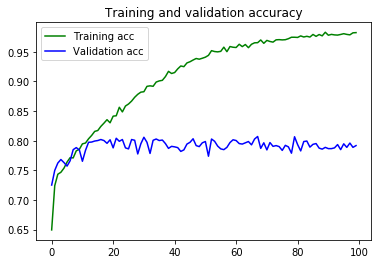

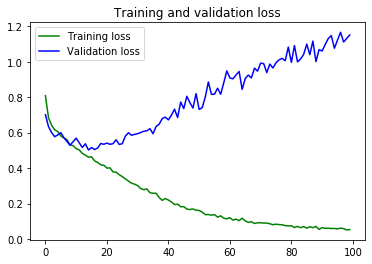

In [45]:
# Plot train/test loss and accuracy
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [55]:
# GRU Model 2: reduce number of epochs
model_4 = Sequential()
model_4.add(embedding_layer)
model_4.add(GRU(256, 
               dropout = 0.2, 
               recurrent_dropout = 0.5,
                 return_sequences = True))
model_4.add(GRU(128,
                dropout = 0.2,
                recurrent_dropout = 0.5))
model_4.add(Dense(3, activation='softmax'))
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [56]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
gru (GRU)                    (None, 30, 256)           274944    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 2,000,455
Trainable params: 423,555
Non-trainable params: 1,576,900
_________________________________________________________________


In [57]:
history_4 = model_4.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 11s 288ms/step - loss: 0.8735 - acc: 0.6158 - val_loss: 0.8194 - val_acc: 0.6598
Epoch 2/100
37/37 [==============================] - 10s 266ms/step - loss: 0.7746 - acc: 0.6653 - val_loss: 0.7385 - val_acc: 0.6560
Epoch 3/100
37/37 [==============================] - 10s 268ms/step - loss: 0.6933 - acc: 0.7045 - val_loss: 0.6583 - val_acc: 0.7315
Epoch 4/100
37/37 [==============================] - 10s 271ms/step - loss: 0.6602 - acc: 0.7277 - val_loss: 0.6130 - val_acc: 0.7529
Epoch 5/100
37/37 [==============================] - 10s 267ms/step - loss: 0.6101 - acc: 0.7484 - val_loss: 0.5669 - val_acc: 0.7725
Epoch 6/100
37/37 [==============================] - 10s 267ms/step - loss: 0.5824 - acc: 0.7644 - val_loss: 0.5497 - val_acc: 0.7781
Epoch 7/100
37/37 [==============================] - 10s 267ms/step - loss: 0.5621 - acc: 0.7689 - val_loss: 0.5570 - val_acc: 0.7862
Epoch 8/100
37/37 [==============================] - 12s 329ms

Epoch 62/100
37/37 [==============================] - 10s 281ms/step - loss: 0.1285 - acc: 0.9520 - val_loss: 0.7645 - val_acc: 0.7857
Epoch 63/100
37/37 [==============================] - 10s 281ms/step - loss: 0.1315 - acc: 0.9515 - val_loss: 0.7160 - val_acc: 0.8062
Epoch 64/100
37/37 [==============================] - 10s 277ms/step - loss: 0.1200 - acc: 0.9528 - val_loss: 0.7453 - val_acc: 0.8020
Epoch 65/100
37/37 [==============================] - 10s 278ms/step - loss: 0.1168 - acc: 0.9577 - val_loss: 0.7642 - val_acc: 0.7985
Epoch 66/100
37/37 [==============================] - 10s 277ms/step - loss: 0.1081 - acc: 0.9595 - val_loss: 0.8127 - val_acc: 0.7968
Epoch 67/100
37/37 [==============================] - 10s 277ms/step - loss: 0.1117 - acc: 0.9603 - val_loss: 0.7896 - val_acc: 0.8050
Epoch 68/100
37/37 [==============================] - 10s 279ms/step - loss: 0.1069 - acc: 0.9623 - val_loss: 0.7931 - val_acc: 0.8075
Epoch 69/100
37/37 [==============================] - 1

In [58]:
loss, accuracy = model_4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9570
Testing Accuracy:  0.7749
